# Problem
![problem.jpeg](problem.jpeg)

# Solution

In [23]:
%%latex
Let $\rm{Prob}\{\mathbf{e}\}$ be the probability of an event $\mathbf{e}$ occurs. Thus $P(a)$ is:
    \begin{equation}
    P(a) = \rm{Prob}\{ \sin^2(\pi x) + \sin^2(\pi y) \gt 1\},
    \label{eq:paorig}
    \end{equation}
where $x$ and $y$ be chosen independently at uniformly random from the interval $[0, a]$ and $[0, 1]$, respectively.


<IPython.core.display.Latex object>

In [24]:
%%latex
Because
\begin{align*}
\sin^2(\pi x) + \sin^2(\pi y) \gt 1
& \Rightarrow \frac{1-\cos(2\pi x)}{2} + \frac{1-\cos(2\pi y)}{2} \gt 1 &&\text{(pakai rumus $\cos(2\alpha)$)} \\
& \Rightarrow 2 - [\cos(2\pi x) + \cos(2\pi y)] \gt 2 \\
& \Rightarrow - [\cos(2\pi x) + \cos(2\pi y)] \gt 0 \\
& \Rightarrow \cos(2\pi x) + \cos(2\pi y) \lt 0 \\
& \Rightarrow 2\cos(\pi(x+y)) \times \cos(\pi(x-y)) \lt 0 && \text{(pakai rumus $\cos\alpha + \cos\beta$)}\\
& \Rightarrow \cos(\pi(x+y)) \times \cos(\pi(x-y)) \lt 0,
\end{align*}

<IPython.core.display.Latex object>

In [25]:
%%latex
then, the above event probabilty $P(a)$ in equation $\eqref{eq:paorig}$ is identical to:
    \begin{equation}
    P(a) = \rm{Prob}\{ \cos(\pi(x+y)) \times \cos(\pi(x-y)) \lt 0 \}.
    \label{eq:pasoln}
    \end{equation}


<IPython.core.display.Latex object>

In [26]:
%%latex
As the first step, we need to find the location of points $(x, y)$ inside the given area, 
that satisfy $\cos(\pi(x+y)) \times \cos(\pi(x-y)) \lt 0$, that is:
    \begin{equation}
    \{ (x,y) \mid (\cos(\pi(x+y)) \times \cos(\pi(x-y)) \lt 0) 
      \cap (0 \leq x \leq a) \cap (0 \leq y \leq 1) \}.
    \label{eq:soln-area}
    \end{equation}

<IPython.core.display.Latex object>

In [27]:
%%latex
There are 2 cases that satisfy {$\cos(\pi(x+y)) \times \cos(\pi(x-y)) \lt 0$}, 
that is, {$\cos(\pi(x+y)) \gt 0$ AND $\cos(\pi(x-y)) \lt 0$} as the first case, 
OR {$\cos(\pi(x+y)) \lt 0$ AND $\cos(\pi(x-y)) \gt 0$} as the second case.
So, equation $\eqref{eq:soln-area}$ can be found as the union of the above 2 cases, 
that is (all inside $((0 \leq x \leq a) \cap (0 \leq y \leq 1))$):
    \begin{align}
    \{ (x,y) \mid (\cos(\pi(x+y)) \times \cos(\pi(x-y)) \lt 0) \} = \\
    \{ (x,y) \mid (\cos(\pi(x+y)) \gt 0) \cap (\cos(\pi(x-y)) \lt 0) \} \label{eq:soln-area-case1}  && \text{(case 1)}\\ 
    \cup
    \{ (x,y) \mid (\cos(\pi(x+y)) \lt 0) \cap (\cos(\pi(x-y)) \gt 0) \} && \text{(case 2)}.
    \label{eq:soln-area-case2}
    \end{align}

<IPython.core.display.Latex object>

In [28]:
%%latex
Keeping in mind that $x \in [0, a]$ (with $0 \le a \le 1$) and $y \in [0, 1]$, below we find the regions of $(x, y)$ that satisfy case 1 and case 2.

<IPython.core.display.Latex object>

## Case 1: $\{ (x,y) \mid (\cos(\pi(x+y)) \gt 0) \cap (\cos(\pi(x-y)) \lt 0) \}$

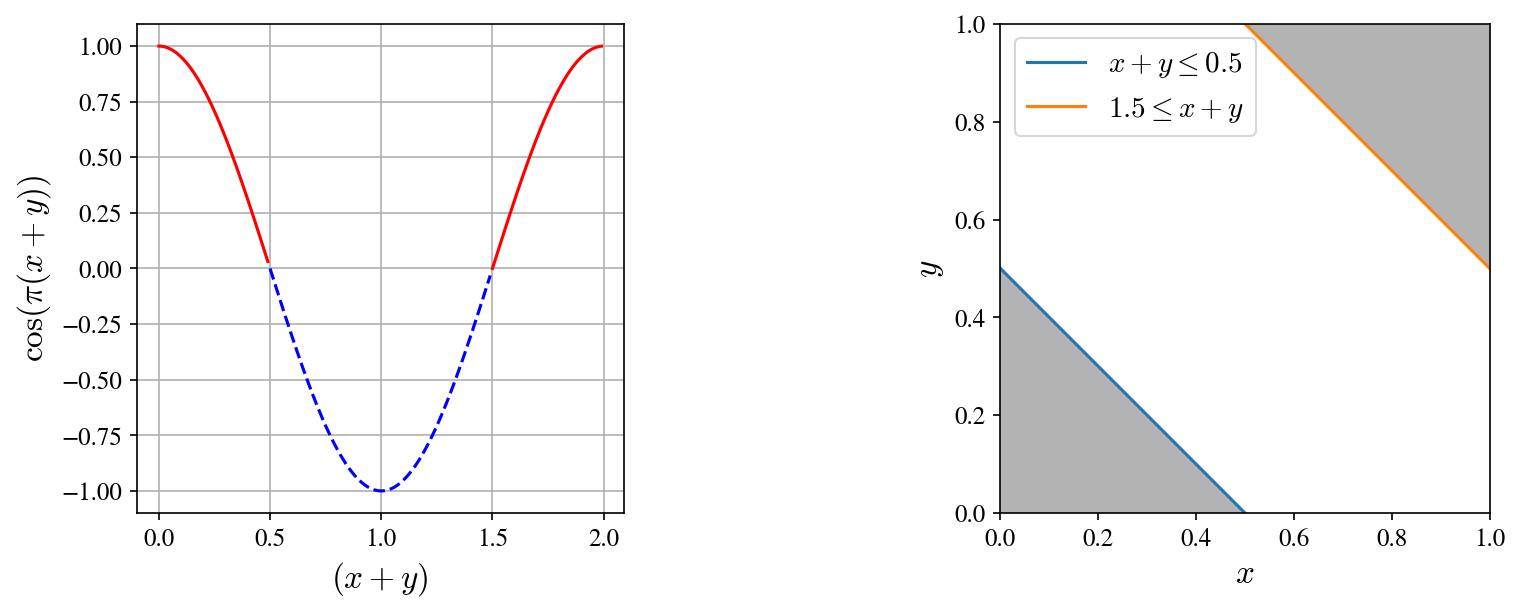

In [29]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams['mathtext.fontset'] = 'cm'  # or 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.subplot(1, 2, 1)
xpy=np.arange(0, 0.5, 0.01)
cosxpy=np.cos(np.pi*xpy)
plt.plot(xpy,cosxpy, "r-")
xpy=np.arange(0.5, 1.5, 0.01)
cosxpy=np.cos(np.pi*xpy)
plt.plot(xpy,cosxpy, "b--")
xpy=np.arange(1.5, 2.0, 0.01)
cosxpy=np.cos(np.pi*xpy)
plt.plot(xpy,cosxpy, "r-")
plt.xlabel("$(x+y)$", fontsize=16)
plt.ylabel("$\cos(\pi(x+y))$", fontsize=16)
plt.axis('scaled')
plt.grid(True)
plt.tick_params(labelsize=12)

plt.subplot(1, 2, 2)
# plot the feasible region
d = np.linspace(-2,2,1000)
x,y = np.meshgrid(d,d)
plt.imshow( ( ((y>=0) & (y<=1) & (x>=0) & (x<=1) & (y<=0.5-x) & (y>= -x)) |
            ((y>=0) & (y<=1) & (x>=0) & (x<=1) & (y<=2-x) & (y>= 1.5-x)) ) .astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
x = np.linspace(-2, 2, 2000)
y1 = 0.5 - x
y2 = 1.5 - x

# Make plot
plt.plot(x, y1, label=r'$x+y \leq 0.5$')
plt.plot(x, y2, label=r'$1.5 \leq x+y$')
plt.axis("scaled")
# plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$y$', fontsize=16)
plt.legend(fontsize=14)
plt.tick_params(labelsize=12)

#plt.tight_layout()
plt.tight_layout(rect=[0, 0.03, 2, 0.95])
plt.show()

In [30]:
%%latex
In case 1, the former term of equation $\eqref{eq:soln-area-case1}$, that is, $\cos(\pi(x+y))$,
will satisfy $(\cos(\pi(x+y)) \gt 0$ at the above-left red-solid-line cosine plot. So, the region of $(x, y)$ is:
\begin{equation}
(0 \le (x+y) \le 0.5) \cup (1.5 \le (x+y) \le 2.0), 
\end{equation}
which is shown in the above-right figure.
               
               
\indent\makebox[\linewidth]{\rule{\textwidth}{0.4pt}}

<IPython.core.display.Latex object>

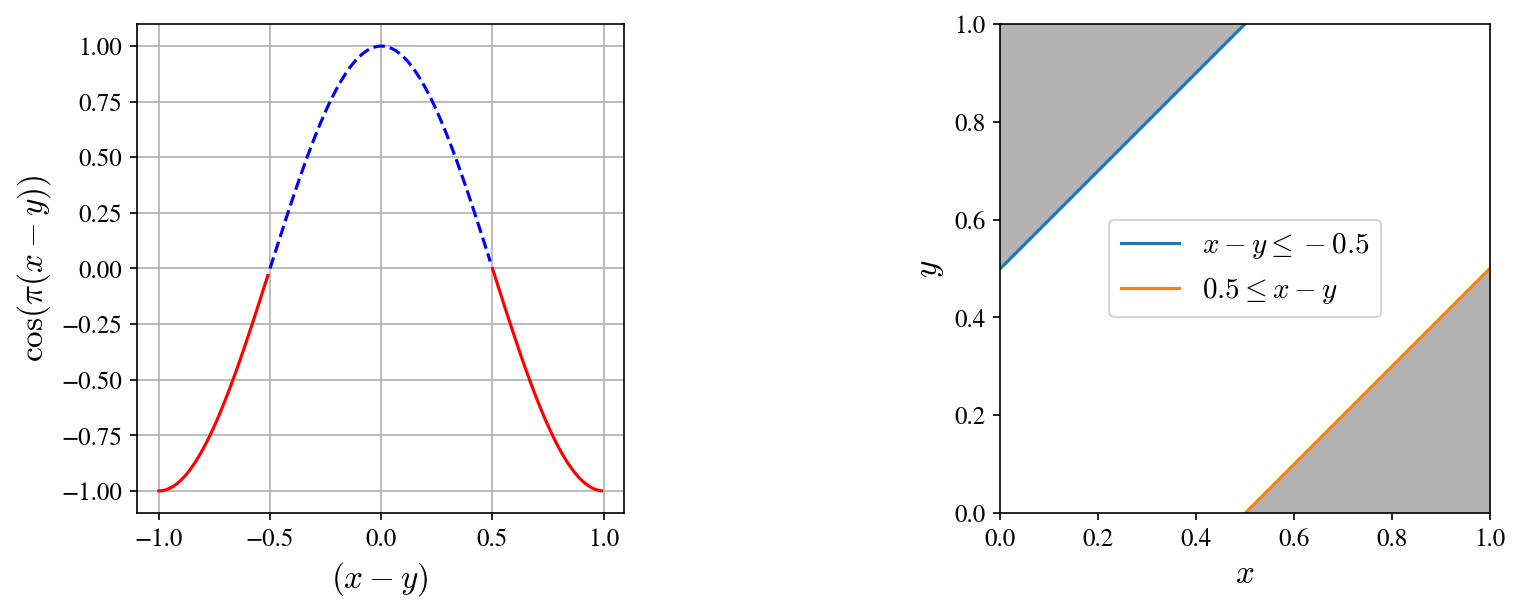

In [31]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams['mathtext.fontset'] = 'cm'  # or 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.subplot(1, 2, 1)
xmy=np.arange(-1, -0.5, 0.01)
cosxmy=np.cos(np.pi*xmy)
plt.plot(xmy,cosxmy, "r-")
xmy=np.arange(-0.5, 0.5, 0.01)
cosxmy=np.cos(np.pi*xmy)
plt.plot(xmy,cosxmy, "b--")
xmy=np.arange(0.5, 1.0, 0.01)
cosxmy=np.cos(np.pi*xmy)
plt.plot(xmy,cosxmy, "r-")
plt.xlabel("$(x-y)$", fontsize=16)
plt.ylabel("$\cos(\pi(x-y))$", fontsize=16)
plt.axis('scaled')
plt.grid(True)
plt.tick_params(labelsize=12)

plt.subplot(1, 2, 2)
# plot the feasible region
d = np.linspace(-2,2,1000)
x,y = np.meshgrid(d,d)
plt.imshow( ( ((y>=0) & (y<=1) & (x>=0) & (x<=1) & (y<=x+1) & (y>= x+0.5)) |
            ((y>=0) & (y<=1) & (x>=0) & (x<=1) & (y<=x-0.5) & (y>= x-1.0)) ) .astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
x = np.linspace(-2, 2, 2000)
y1 = x + 0.5
y2 = x - 0.5

# Make plot
plt.plot(x, y1, label=r'$x-y \leq -0.5$')
plt.plot(x, y2, label=r'$0.5 \leq x-y$')
plt.axis("scaled")
# plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$y$', fontsize=16)
plt.legend(fontsize=14)
plt.tick_params(labelsize=12)

# plt.tight_layout()
plt.tight_layout(rect=[0, 0.03, 2, 0.95])
plt.show()

In [32]:
%%latex
Similarly in case 1, the later term of equation $\eqref{eq:soln-area-case1}$, that is, $\cos(\pi(x-y))$,
will satisfy $(\cos(\pi(x-y)) \lt 0$ at the above-left red-solid-line cosine plot. So, the region of $(x, y)$ is:
\begin{equation}
(-1 \le (x-y) \le -0.5) \cup (0.5 \le (x-y) \le 1), 
\end{equation}
which is shown in the above-right figure.

               
\indent\makebox[\linewidth]{\rule{\textwidth}{0.4pt}}

<IPython.core.display.Latex object>

In [33]:
%%latex
We see from the figures that the region
\begin{equation*}
(0 \le (x+y) \le 0.5) \cup (1.5 \le (x+y) \le 2.0), 
\end{equation*}
and the region
\begin{equation*}
(-1 \le (x-y) \le -0.5) \cup (0.5 \le (x-y) \le 1),
\end{equation*}
do NOT overlap, so the region that satisfy case 1 does NOT exist.

<IPython.core.display.Latex object>

## Case 2: $\{ (x,y) \mid (\cos(\pi(x+y)) \lt 0) \cap (\cos(\pi(x-y)) \gt 0) \}$

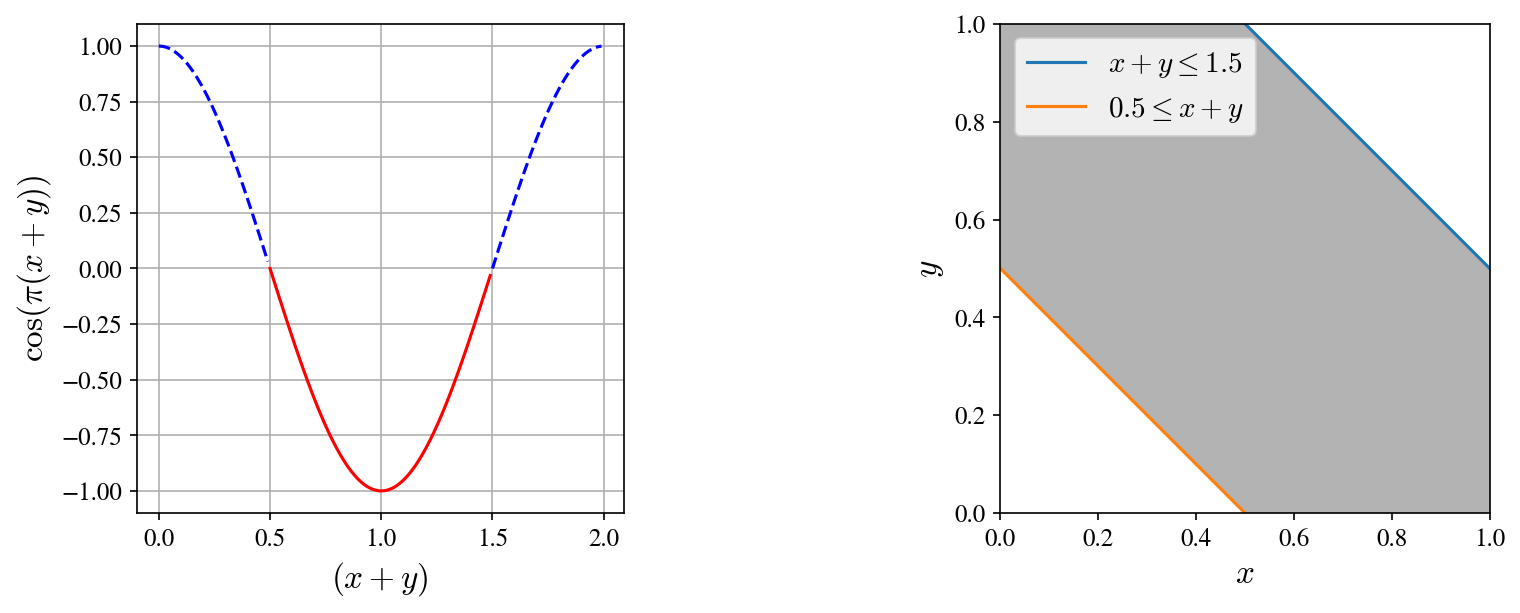

In [34]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams['mathtext.fontset'] = 'cm'  # or 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.subplot(1, 2, 1)
xpy=np.arange(0, 0.5, 0.01)
cosxpy=np.cos(np.pi*xpy)
plt.plot(xpy,cosxpy, "b--")
xpy=np.arange(0.5, 1.5, 0.01)
cosxpy=np.cos(np.pi*xpy)
plt.plot(xpy,cosxpy, "r-")
xpy=np.arange(1.5, 2.0, 0.01)
cosxpy=np.cos(np.pi*xpy)
plt.plot(xpy,cosxpy, "b--")
plt.xlabel("$(x+y)$", fontsize=16)
plt.ylabel("$\cos(\pi(x+y))$", fontsize=16)
plt.axis('scaled')
plt.grid(True)
plt.tick_params(labelsize=12)

plt.subplot(1, 2, 2)
# plot the feasible region
d = np.linspace(-2,2,1000)
x,y = np.meshgrid(d,d)
plt.imshow( ( (y>=0) & (y<=1) & (x>=0) & (x<=1) & (y<=1.5-x) & (y>= 0.5-x) ) .astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
x = np.linspace(-2, 2, 2000)
y1 = 1.5 - x
y2 = 0.5 - x

# Make plot
plt.plot(x, y1, label=r'$x+y \leq 1.5$')
plt.plot(x, y2, label=r'$0.5 \leq x+y$')
plt.axis("scaled")
# plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$y$', fontsize=16)
plt.legend(fontsize=14)
plt.tick_params(labelsize=12)

#plt.tight_layout()
plt.tight_layout(rect=[0, 0.03, 2, 0.95])
plt.show()

In [35]:
%%latex
In case 2, the former term of equation $\eqref{eq:soln-area-case2}$, that is, $\cos(\pi(x+y))$,
will satisfy $(\cos(\pi(x+y)) \lt 0$ at the above-left red-solid-line cosine plot. So, the region of $(x, y)$ is:
\begin{equation}
(0.5 \le (x+y) \le 1.5), 
\end{equation}
which is shown in the above-right figure.

\indent\makebox[\linewidth]{\rule{\textwidth}{0.4pt}}

<IPython.core.display.Latex object>

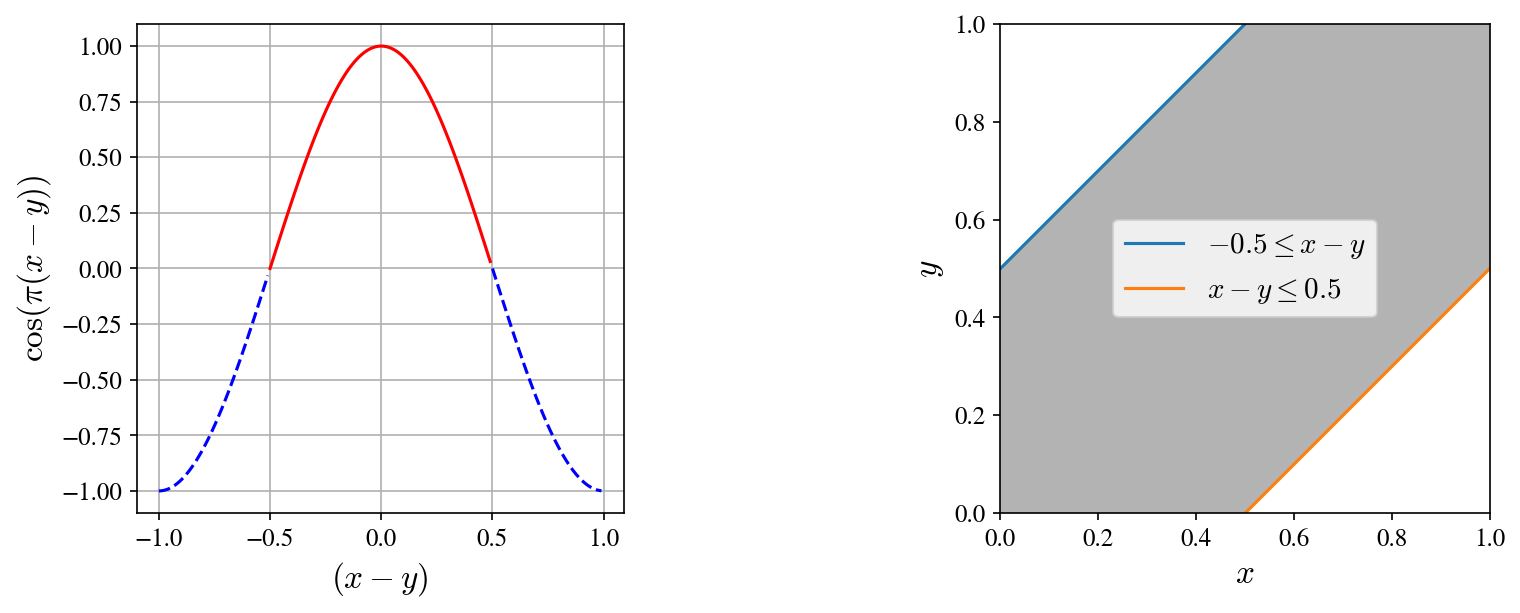

In [36]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams['mathtext.fontset'] = 'cm'  # or 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.subplot(1, 2, 1)
xmy=np.arange(-1, -0.5, 0.01)
cosxmy=np.cos(np.pi*xmy)
plt.plot(xmy,cosxmy, "b--")
xmy=np.arange(-0.5, 0.5, 0.01)
cosxmy=np.cos(np.pi*xmy)
plt.plot(xmy,cosxmy, "r-")
xmy=np.arange(0.5, 1.0, 0.01)
cosxmy=np.cos(np.pi*xmy)
plt.plot(xmy,cosxmy, "b--")
plt.xlabel("$(x-y)$", fontsize=16)
plt.ylabel("$\cos(\pi(x-y))$", fontsize=16)
plt.axis('scaled')
plt.grid(True)
plt.tick_params(labelsize=12)

plt.subplot(1, 2, 2)
# plot the feasible region
d = np.linspace(-2,2,1000)
x,y = np.meshgrid(d,d)
plt.imshow( ( (y>=0) & (y<=1) & (x>=0) & (x<=1) & (y<=x+0.5) & (y>= x-0.5) ) .astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
x = np.linspace(-2, 2, 2000)
y1 = x + 0.5
y2 = x - 0.5

# Make plot
plt.plot(x, y1, label=r'$-0.5 \leq x-y $')
plt.plot(x, y2, label=r'$x-y \leq 0.5$')
plt.axis("scaled")
# plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$y$', fontsize=16)
plt.legend(fontsize=14)
plt.tick_params(labelsize=12)

#plt.tight_layout()
plt.tight_layout(rect=[0, 0.03, 2, 0.95])
plt.show()

In [37]:
%%latex
Similarly in case 2, the later term of equation $\eqref{eq:soln-area-case2}$, that is, $\cos(\pi(x-y))$,
will satisfy $(\cos(\pi(x-y)) \gt 0$ at the above-left red-solid-line cosine plot. So, the region of $(x, y)$ is:
\begin{equation}
(-0.5 \le (x-y) \le 0.5),
\end{equation}
which is shown in the above-right figure.

\indent\makebox[\linewidth]{\rule{\textwidth}{0.4pt}}

<IPython.core.display.Latex object>

In [38]:
%%latex
We see from the figures that the region
\begin{equation*}
(0.5 \le (x+y) \le 1.5),
\end{equation*}
and the region
\begin{equation*}
(-0.5 \le (x-y) \le 0.5),
\end{equation*}
do overlap, so the region that satisfy case 2 is:

<IPython.core.display.Latex object>

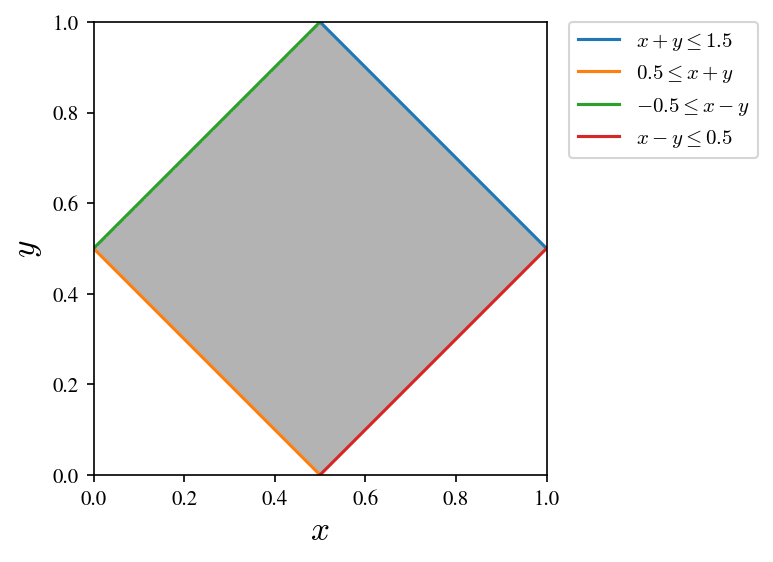

In [39]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams['mathtext.fontset'] = 'cm'  # or 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# plot the feasible region
d = np.linspace(-2,2,1000)
x,y = np.meshgrid(d,d)
plt.imshow( ( (y>=0) & (y<=1) & (x>=0) & (x<=1) & (y<=1.5-x) & (y>= 0.5-x) &
                 (y>=0) & (y<=1) & (x>=0) & (x<=1) & (y<=x+0.5) & (y>= x-0.5)  ) .astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
x = np.linspace(-2, 2, 2000)
y1 = 1.5 - x
y2 = 0.5 - x
y3 = x + 0.5
y4 = x - 0.5

# Make plot
plt.plot(x, y1, label=r'$x+y \leq 1.5$')
plt.plot(x, y2, label=r'$0.5 \leq x+y$')
plt.plot(x, y3, label=r'$-0.5 \leq x-y $')
plt.plot(x, y4, label=r'$x-y \leq 0.5$')

plt.axis("scaled")
# plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$y$', fontsize=16)

plt.show()

In [40]:
%%latex
Thus, the above region is the region of $(x, y)$ which satisfy \{$\cos(\pi(x+y)) \times \cos(\pi(x-y)) \lt 0$\}:
    \begin{equation}
    \{ (x,y) \mid (\cos(\pi(x+y)) \times \cos(\pi(x-y)) \lt 0) 
      \cap (0 \leq x \leq 1) \cap (0 \leq y \leq 1) \},
    \end{equation}
which is also the region of $(x, y)$ which satisfy \{$\sin^2(\pi x) + \sin^2(\pi y) \gt 1$\}:
    \begin{equation}
    \{ (x,y) \mid (\sin^2(\pi x) + \sin^2(\pi y) \gt 1) 
      \cap (0 \leq x \leq 1) \cap (0 \leq y \leq 1) \}.
    \end{equation}

<IPython.core.display.Latex object>

## Formulation of function $P(a)$

In [41]:
%%latex
$P(a)$ is the probability of point $(x,y)$ lies inside the above shown region with additional constraint $\{x \in [0,a]\}$,
when $x$ and $y$ is chosen uniform-randomly independently from region $\{(x,y) \mid x \in [0,a], y \in [0,1]\}$.
This probability is the ratio of "the area of the above shown region with additional constraint $\{x \in [0,a]\}$" to
"the area of the region $\{(x,y) \mid x \in [0,a], y \in [0,1]\}$." Hence,
\begin{align*}
P(a) &= \frac{\text{Area of the above region } \cap \{0 \le x \le a\}}
              {\text{Area of the region }\{(x,y) \mid x \in [0,a], y \in [0,1]\}} \\
&= \frac{\text{Area of the above region } \cap \{0 \le x \le a\}}
    {a}.
\end{align*}


<IPython.core.display.Latex object>

### Function $P(a)$ when $0 \lt a \le 0.5$

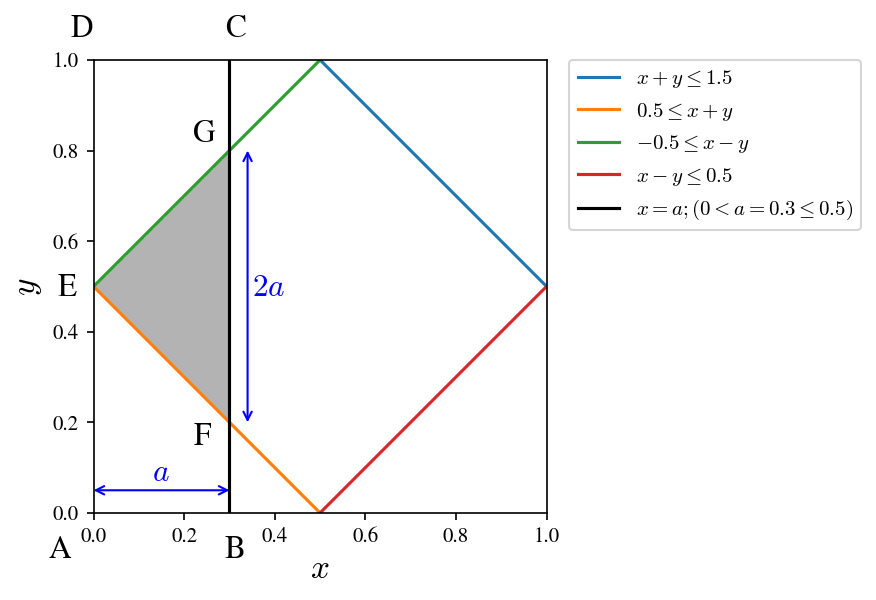

In [42]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams['mathtext.fontset'] = 'cm'  # or 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

def annotate_dim(ax,xyfrom,xyto,text=None,fontsize=15, color='black', xoffset=0.0, yoffset=0.0):

    if text is None:
        text = str(np.sqrt( (xyfrom[0]-xyto[0])**2 + (xyfrom[1]-xyto[1])**2 ))

    ax.annotate("",xyfrom,xyto,arrowprops=dict(color=color, arrowstyle='<->', shrinkA=0, shrinkB=0))
    ax.text((xyto[0]+xyfrom[0])/2+xoffset,(xyto[1]+xyfrom[1])/2+yoffset,text,fontsize=fontsize,color=color)

# plot the feasible region
d = np.linspace(-2,2,1000)
x,y = np.meshgrid(d,d)
plt.imshow( ( (y>=0) & (y<=1) & (x>=0) & (x<=1) & (y<=1.5-x) & (y>= 0.5-x) &
                 (y>=0) & (y<=1) & (x>=0) & (x<=1) & (y<=x+0.5) & (y>= x-0.5) & (x<=0.3)  ) .astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
x = np.linspace(-2, 2, 2000)
y1 = 1.5 - x
y2 = 0.5 - x
y3 = x + 0.5
y4 = x - 0.5

# Make plot
plt.plot(x, y1, label=r'$x+y \leq 1.5$')
plt.plot(x, y2, label=r'$0.5 \leq x+y$')
plt.plot(x, y3, label=r'$-0.5 \leq x-y $')
plt.plot(x, y4, label=r'$x-y \leq 0.5$')
plt.axvline(x=0.3, label=r'$x=a;  (0 < a=0.3 \leq 0.5)$', color='black')

plt.axis("scaled")
# plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$y$', fontsize=16)

plt.text(-0.1,-0.1, 'A', fontsize=15)
plt.text(0.29,-0.1, 'B', fontsize=15)
plt.text(0.29,1.05, 'C', fontsize=15)
plt.text(-0.05,1.05, 'D', fontsize=15)

plt.text(-0.08,0.48, 'E', fontsize=15)
plt.text(0.22,0.15, 'F', fontsize=15)
plt.text(0.22,0.82, 'G', fontsize=15)
annotate_dim(plt.gca(),[0,0.05],[0.3,0.05],'$a$', fontsize=15, color='blue', xoffset=-0.02, yoffset=0.02)
annotate_dim(plt.gca(),[0.34,0.2],[0.34,0.8],'$2a$', fontsize=15, color='blue', xoffset=0.01, yoffset=-0.02)
plt.show()

In [43]:
%%latex
From the above figure, when $0 \lt a \le 0.5$, then $P(a)$ is:
    \begin{align*}
    P(a) &= \frac{\text{Area of the shaded region, that is, area of } \triangle\text{EFG}} 
                    {\text{Area of rectangle ABCD}} \\
        &= \frac{\frac{1}{2} \times 2a \times a}{a \times 1.0} \\
        &= a.
    \addtocounter{equation}{1}
    \label{eq:p_a_1}  \tag{\theequation}
    \end{align*}

<IPython.core.display.Latex object>

### Function $P(a)$ when $0.5 \lt a \le 1.0$

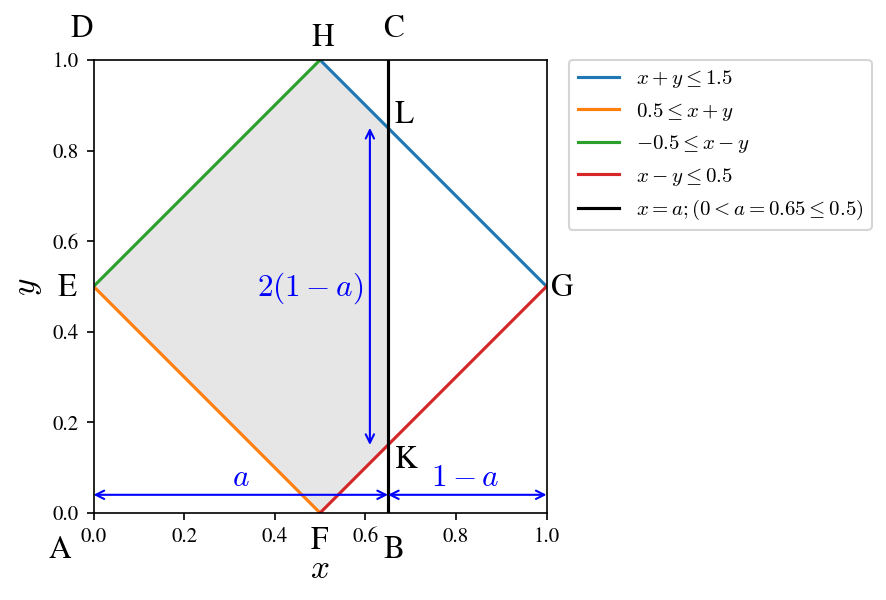

In [44]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams['mathtext.fontset'] = 'cm'  # or 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

def annotate_dim(ax,xyfrom,xyto,text=None,fontsize=15, color='black', xoffset=0.0, yoffset=0.0):

    if text is None:
        text = str(np.sqrt( (xyfrom[0]-xyto[0])**2 + (xyfrom[1]-xyto[1])**2 ))

    ax.annotate("",xyfrom,xyto,arrowprops=dict(color=color, arrowstyle='<->', shrinkA=0, shrinkB=0))
    ax.text((xyto[0]+xyfrom[0])/2+xoffset,(xyto[1]+xyfrom[1])/2+yoffset,text,fontsize=fontsize,color=color)

# plot the feasible region
d = np.linspace(-2,2,1000)
x,y = np.meshgrid(d,d)
plt.imshow( ( (y>=0) & (y<=1) & (x>=0) & (x<=1) & (y<=1.5-x) & (y>= 0.5-x) &
                 (y>=0) & (y<=1) & (x>=0) & (x<=1) & (y<=x+0.5) & (y>= x-0.5) & (x<=0.65)  ) .astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.1);

# plot the lines defining the constraints
x = np.linspace(-2, 2, 2000)
y1 = 1.5 - x
y2 = 0.5 - x
y3 = x + 0.5
y4 = x - 0.5

aa=0.65
# Make plot
plt.plot(x, y1, label=r'$x+y \leq 1.5$')
plt.plot(x, y2, label=r'$0.5 \leq x+y$')
plt.plot(x, y3, label=r'$-0.5 \leq x-y $')
plt.plot(x, y4, label=r'$x-y \leq 0.5$')
plt.axvline(x=aa, label=r'$x=a;  (0 < a=0.65 \leq 0.5)$', color='black')

plt.axis("scaled")
# plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$y$', fontsize=16)

plt.text(-0.1,-0.1, 'A', fontsize=15)
plt.text(aa-0.01,-0.1, 'B', fontsize=15)
plt.text(aa-0.01,1.05, 'C', fontsize=15)
plt.text(-0.05,1.05, 'D', fontsize=15)

plt.text(-0.08,0.48, 'E', fontsize=15)
plt.text(0.48,-0.08, 'F', fontsize=15)
plt.text(1.01,0.48, 'G', fontsize=15)
plt.text(0.48,1.03, 'H', fontsize=15)
plt.text(aa+0.015,aa-0.5-0.05, 'K', fontsize=15)
plt.text(aa+0.015,1.5-aa+0.01, 'L', fontsize=15)
annotate_dim(plt.gca(),[0,0.04],[aa,0.04],'$a$', fontsize=15, color='blue', xoffset=-0.02, yoffset=0.02)
annotate_dim(plt.gca(),[aa,0.04],[1,0.04],'$1-a$', fontsize=15, color='blue', xoffset=-0.08, yoffset=0.02)
annotate_dim(plt.gca(),[aa-0.04,aa-0.5],[aa-0.04,1.5-aa],'$2(1-a)$', fontsize=15, color='blue', xoffset=-0.25, yoffset=-0.02)
plt.show()

In [45]:
%%latex
From the above figure, when $0.5 \lt a \le 1$, then $P(a)$ is:
    \begin{align*}
    P(a) &= \frac{\text{Area of the shaded region, that is, area of }\square\text{EFGH} - \text{area of }\triangle\text{GLK}} 
                    {\text{Area of rectangle ABCD}} \\
        &= \frac{2\times(\text{area of }\triangle\text{EGH}) - \text{area of }\triangle\text{GLK}}{\text{Area of rectangle ABCD}} \\
        &= \frac{ 2\times (\frac{1}{2}\times 1.0 \times 0.5) - \frac{1}{2}\times 2(1-a) \times (1-a)}{a \times 1.0} \\
        &= \frac{ \frac{1}{2} - (1-2a+a^2)}{a} \\
        &= \frac{ -\frac{1}{2} +2a-a^2}{a} \\
        &= -a+2-\frac{1}{2a}.
    \addtocounter{equation}{1}
    \label{eq:p_a_2}  \tag{\theequation}
    \end{align*}

<IPython.core.display.Latex object>

### Final form of function $P(a)$

In [46]:
%%latex
Noticing that $P(a=0) = 0$ is satisfied in equation \eqref{eq:p_a_1}, and noticing that 
$P(a=0.5) = 0.5$ is satisfied in both equation \eqref{eq:p_a_1} and \eqref{eq:p_a_2}, then $P(a)$ 
can be expressed as a piecewise-defined function as follows:
\begin{equation}
P(a) = \left\{
        \begin{array}{ll}
            a & \quad 0 \leq a \leq 0.5 \\
            -a+2-\frac{1}{2a} & \quad 0.5 \leq a \leq 1
        \end{array}
    \right.
\end{equation}

<IPython.core.display.Latex object>

## Maximum value of function $P(a)$ when $a \in [0,1]$

In [47]:
%%latex
In the domain $\{a \mid 0\le a \le0.5\}$

<IPython.core.display.Latex object>